<img src="../images/UBRA_Logo_DATA_TRAIN.png" style="width: 800px;">

<img src="../images/pandas.svg" style="width: 400px;">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
pd.set_option('display.max_rows', 15)  # this limits the maximum number of rows
np.set_printoptions(precision=3, suppress=True)  # this is just to make the output look better


In [2]:
corona = pd.read_csv('../data/corona.csv')

In [3]:
corona

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,3664,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,...,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,NaN
1,3665,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,...,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,NaN
2,3666,ARG,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,...,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,NaN
3,3667,ARG,South America,Argentina,2020-01-04,NaN,NaN,NaN,NaN,NaN,...,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,NaN
4,3668,ARG,South America,Argentina,2020-01-05,NaN,NaN,NaN,NaN,NaN,...,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,97627,USA,North America,United States,2021-07-10,33847784.0,9038.0,19102.857,607132.0,139.0,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
4265,97628,USA,North America,United States,2021-07-11,33853948.0,6164.0,19455.286,607156.0,24.0,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
4266,97629,USA,North America,United States,2021-07-12,33888961.0,35013.0,23667.429,607399.0,243.0,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
4267,97630,USA,North America,United States,2021-07-13,33915385.0,26424.0,23981.714,607784.0,385.0,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN


Our dates are not yer recognised as dates:

In [4]:
corona['date']

0       2020-01-01
1       2020-01-02
2       2020-01-03
3       2020-01-04
4       2020-01-05
           ...    
4264    2021-07-10
4265    2021-07-11
4266    2021-07-12
4267    2021-07-13
4268    2021-07-14
Name: date, Length: 4269, dtype: object

Convert dates to datetime:

In [5]:
corona['date'] = pd.to_datetime(corona['date'])

In [6]:
corona = corona.set_index('date')

In [7]:
corona

,Unnamed: 0,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,3664,ARG,South America,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,NaN
2020-01-02,3665,ARG,South America,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,NaN
2020-01-03,3666,ARG,South America,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,NaN
2020-01-04,3667,ARG,South America,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,NaN
2020-01-05,3668,ARG,South America,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,...,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-10,97627,USA,North America,United States,33847784.0,9038.0,19102.857,607132.0,139.0,229.000,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
2021-07-11,97628,USA,North America,United States,33853948.0,6164.0,19455.286,607156.0,24.0,227.714,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
2021-07-12,97629,USA,North America,United States,33888961.0,35013.0,23667.429,607399.0,243.0,255.857,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN


In [8]:
germany = corona[corona['iso_code']=='DEU']
germany

,Unnamed: 0,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
date,,,,,,,,,,,,,,,,,,,,,
2020-01-06,35348,DEU,Europe,Germany,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947,NaN
2020-01-18,35349,DEU,Europe,Germany,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947,NaN
2020-01-24,35350,DEU,Europe,Germany,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947,NaN
2020-01-27,35351,DEU,Europe,Germany,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947,NaN
2020-01-28,35352,DEU,Europe,Germany,4.0,3.0,NaN,NaN,NaN,NaN,...,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-10,35881,DEU,Europe,Germany,3743164.0,809.0,729.286,91239.0,7.0,28.429,...,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947,NaN
2021-07-11,35882,DEU,Europe,Germany,3743732.0,568.0,751.714,91241.0,2.0,28.857,...,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947,NaN
2021-07-12,35883,DEU,Europe,Germany,3744285.0,553.0,774.714,91268.0,27.0,28.571,...,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,0.947,NaN


In [9]:
germany.columns

Index(['Unnamed: 0', 'iso_code', 'continent', 'location', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_p

<Axes: xlabel='date'>

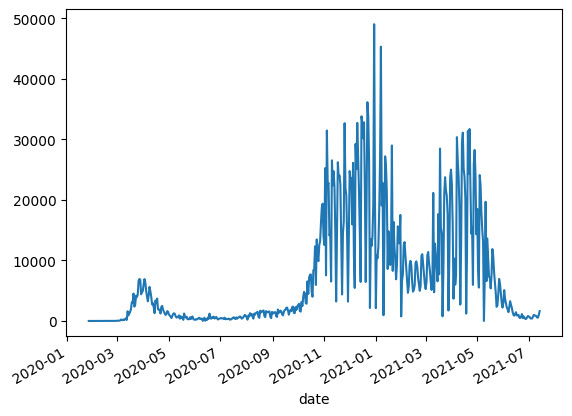

In [10]:
germany['new_cases'].plot()

The plot is matplotlib object, so it can be modified in similar way as we did for the matplotlib plot.

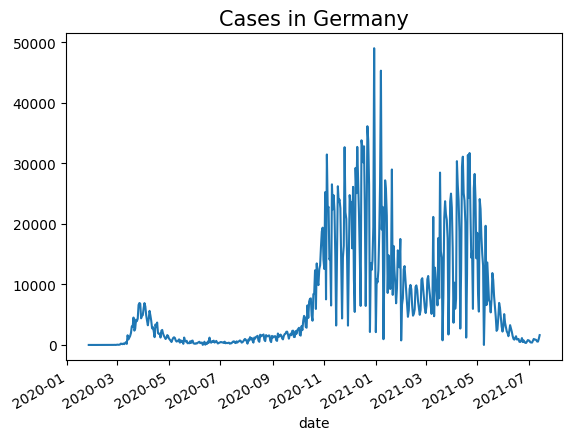

In [11]:
germany['new_cases'].plot()
plt.title('Cases in Germany', fontsize=15);

### Exersise

- Use infromation from [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) to tune the plot.
- plot number of deaths
- plot only data for the year 2021
- plot different parameter
- Select different country and make a plot for it

Two variable at one plot:

<Axes: xlabel='date'>

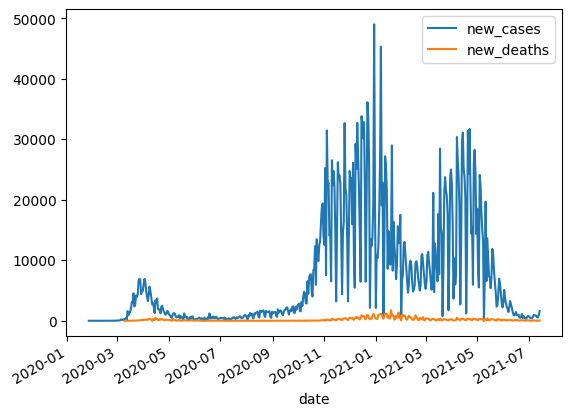

In [12]:
germany[['new_cases','new_deaths']].plot()

<Axes: xlabel='date'>

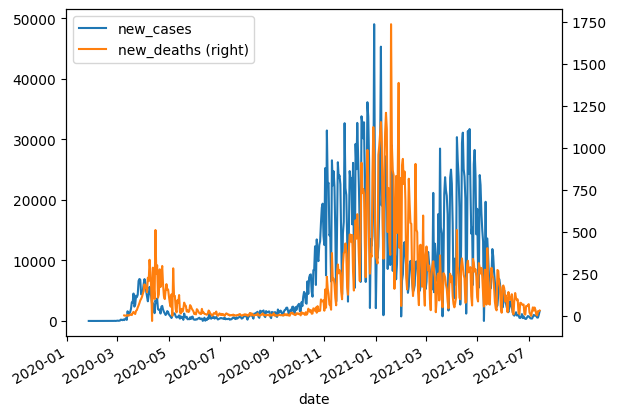

In [13]:
germany[['new_cases','new_deaths']].plot(secondary_y='new_deaths')

Play around with smoothing (show operation by operation what is going on here):

<Axes: xlabel='date'>

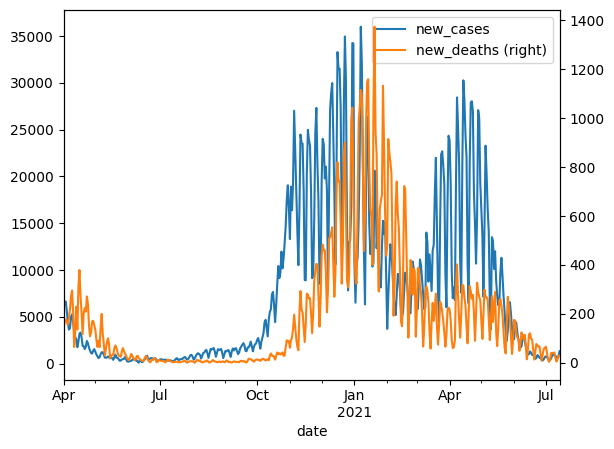

In [14]:
germany[['new_cases','new_deaths']].loc['2020-04':'2021-07'].rolling('2D').mean().plot(secondary_y='new_deaths')

Define smoothed time series:

In [15]:
case_death = germany[['new_cases','new_deaths']].loc['2020-04':'2021-07'].rolling('7D').mean()

<Axes: xlabel='date'>

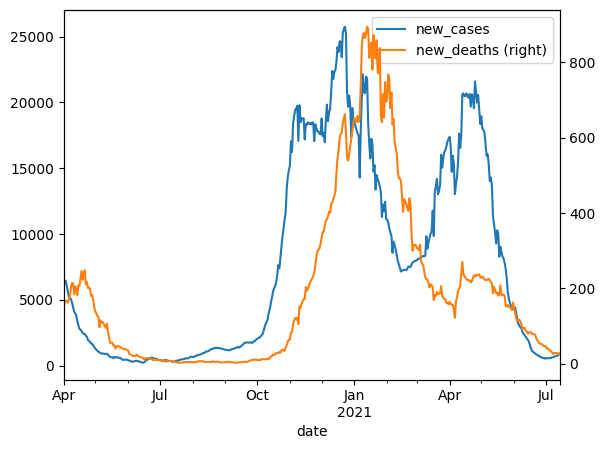

In [16]:
case_death.plot(secondary_y='new_deaths')

There seem to be some correlation:

In [17]:
case_death.corr()

,new_cases,new_deaths
new_cases,1.000000,0.663072
new_deaths,0.663072,1.000000


But it's lagged. You can shift the time series:

In [18]:
case_death['new_deaths']

date
2020-04-01    145.000000
2020-04-02    166.000000
2020-04-03    166.666667
2020-04-04    167.250000
2020-04-05    161.800000
                 ...    
2021-07-10     28.428571
2021-07-11     28.857143
2021-07-12     28.571429
2021-07-13     25.285714
2021-07-14     25.428571
Name: new_deaths, Length: 470, dtype: float64

In [19]:
case_death['new_deaths'].shift(-2)

date
2020-04-01    166.666667
2020-04-02    167.250000
2020-04-03    161.800000
2020-04-04    172.500000
2020-04-05    177.285714
                 ...    
2021-07-10     28.571429
2021-07-11     25.285714
2021-07-12     25.428571
2021-07-13           NaN
2021-07-14           NaN
Name: new_deaths, Length: 470, dtype: float64

And try to find a lag with largest correlation:

In [20]:
case_death['new_cases'].corr(case_death['new_deaths'].shift(-5))

np.float64(0.7121235732806988)

## Exersise

NOTE: I am not epidemiologist, this analysis might be tottaly wrong from scientific point of view, we just doing this for training!

- Compute lagged correlation for lags from 0 to -50 (use `case_death` variable)
- Create a plot with lags on x and correlations on y
- Find the lag with larges correlation (use [np.armax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) function)

- Do the same thing for different country and see if the results are similar

## Work with several countries

In [21]:
corona.loc['2021-01-01']

,Unnamed: 0,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,4030,ARG,South America,Argentina,1629594.0,4080.0,7862.857,43319.0,74.0,128.143,...,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.845,NaN
2021-01-01,13330,BRA,South America,Brazil,7700578.0,24605.0,36002.571,195411.0,462.0,703.286,...,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.765,NaN
2021-01-01,35691,DEU,Europe,Germany,1762637.0,2117.0,18557.286,34145.0,354.0,652.143,...,NaN,156.139,8.31,28.2,33.1,NaN,8.00,81.33,0.947,NaN
2021-01-01,42712,IND,Asia,India,10286709.0,20035.0,16798.714,148994.0,256.0,235.857,...,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645,NaN
2021-01-01,46473,ITA,Europe,Italy,2129376.0,22210.0,14431.714,74621.0,462.0,466.000,...,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892,NaN
2021-01-01,76382,RUS,Europe,Russia,3153960.0,26613.0,27238.571,56798.0,527.0,544.714,...,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824,NaN
2021-01-01,96897,GBR,Europe,United Kingdom,2549693.0,53458.0,45963.143,74237.0,615.0,562.143,...,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN
2021-01-01,97437,USA,North America,United States,20254160.0,153916.0,197148.286,354298.0,2132.0,2614.714,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN


data on some particular day

<Axes: xlabel='iso_code'>

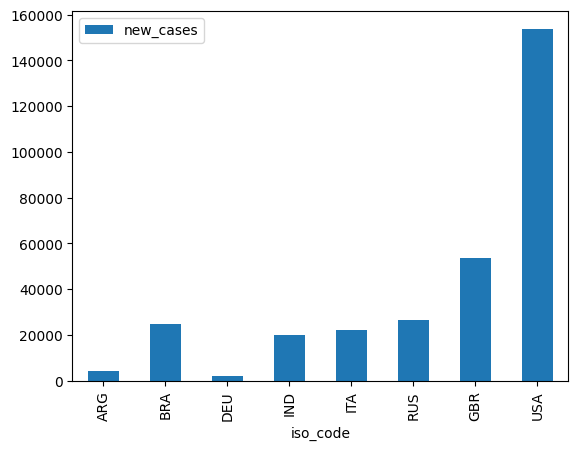

In [22]:
corona.loc['2021-01-01'].plot(kind='bar',x='iso_code', y='new_cases')

We can aggregate values bases on `iso_code`:

In [23]:
corona.groupby('iso_code')['new_cases'].sum()

iso_code
ARG     4702657.0
BRA    19209729.0
DEU     3746935.0
GBR     5252655.0
IND    30946074.0
ITA     4275846.0
RUS     5785542.0
USA    33947229.0
Name: new_cases, dtype: float64

Let's check is it's consistent with the last value of `total_cases`:

In [24]:
corona.loc['2021-07-14']['total_cases']

date
2021-07-14     4702657.0
2021-07-14    19209729.0
2021-07-14     3746935.0
2021-07-14    30946074.0
2021-07-14     4275846.0
2021-07-14     5785542.0
2021-07-14     5252655.0
2021-07-14    33947230.0
Name: total_cases, dtype: float64

What if we want to compare countries:

In [25]:
count_total_cases = corona.pivot_table(index=['date'], 
            columns=['iso_code'], values='new_cases')
count_total_cases

iso_code,ARG,BRA,DEU,GBR,IND,ITA,RUS,USA
date,,,,,,,,
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2020-01-27,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
2021-07-10,11561.0,48504.0,809.0,31835.0,41506.0,1394.0,24607.0,9038.0
2021-07-11,8850.0,20937.0,568.0,31382.0,37154.0,1391.0,24544.0,6164.0
2021-07-12,14989.0,17031.0,553.0,34810.0,0.0,887.0,24649.0,35013.0


<Axes: xlabel='date'>

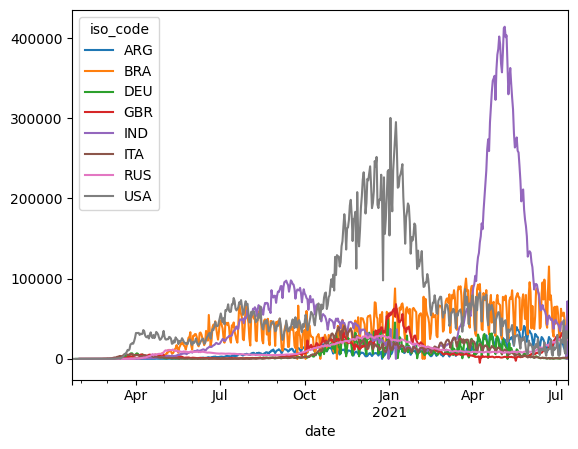

In [26]:
count_total_cases.plot()

## Exersise

- Create variable with `new_cases_per_million` for each country
- plot it
- apply 7 day rolling mean and plot it
- make the plot look nice, select different time periods
- compute correlations between all countries (do they make sence?)